In [1]:
import pandas as pd
import numpy as np
import urllib.request
import unidecode
import matplotlib.pyplot as plt

In [2]:
data_wiatrak = pd.read_excel('workdir/dane_wiatraki/Gaj5.xlsx', sheet_name = '1250164')

In [3]:
data_wiatrak = data_wiatrak.iloc[::6,:]

In [4]:
data_wiatrak

,Time,Wind Ø [m/s],Energy prod. [MWh],Power Ø [MW],Nacelle position [°],Air pressure Ø [mBar],Air humidity Ø [%]
0,2021-07-01 00:00:00,1.7,0.000,-0.003,289,975,69
6,2021-07-01 01:00:00,2.9,0.012,0.071,264,976,70
12,2021-07-01 02:00:00,2.2,0.003,0.020,269,975,70
18,2021-07-01 03:00:00,4.5,0.060,0.359,259,975,69
24,2021-07-01 04:00:00,4.5,0.050,0.301,263,975,71
...,...,...,...,...,...,...,...
56130,2022-07-22 19:00:00,3.1,0.008,0.048,6,981,36
56136,2022-07-22 20:00:00,3.8,0.018,0.104,336,981,38
56142,2022-07-22 21:00:00,4.5,0.045,0.272,11,981,41
56148,2022-07-22 22:00:00,6.4,0.116,0.696,1,981,43


In [5]:
imgw = pd.read_csv('workdir/dane_wiatraki/s_t_07_2022.csv', header=None)

d:\Programy\Anaconda\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (6,34,56) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
imgw

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,349190600,BIELSKO-BIA�A,2022,7,1,0,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
1,349190600,BIELSKO-BIA�A,2022,7,1,1,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
2,349190600,BIELSKO-BIA�A,2022,7,1,2,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
3,349190600,BIELSKO-BIA�A,2022,7,1,3,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
4,349190600,BIELSKO-BIA�A,2022,7,1,4,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,354220195,SUWA�KI,2022,7,31,19,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43125,354220195,SUWA�KI,2022,7,31,20,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43126,354220195,SUWA�KI,2022,7,31,21,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
43127,354220195,SUWA�KI,2022,7,31,22,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8


In [7]:
with urllib.request.urlopen('https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/terminowe/synop/s_t_format.txt') as file:
    lines = file.readlines()
lines = lines[1:-8]
columns = []
for line in lines:
    columns.append(' '.join(line.decode("utf-8", "ignore").split()[:-1]))
    # columns.append(' '.join(line.decode().split()[:-1]))

In [8]:
imgw.columns = columns

In [9]:
imgw

,Kod stacji,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Wysoko podstawy chmur CL CM szyfrowana [kod],Status pomiaru HPOD,Wysoko podstawy niszej [m],Status pomiaru HPON,...,Wysoko wieo spadego niegu [cm],Status pomiaru HSS,Wysoko niegu na poletku [cm],Status pomiaru GRSN,Gatunek niegu [kod],Uksztatowanie pokrywy [kod],Wysoko prbki [cm],Status pomiaru HPRO,Ciar prbki [g],Status pomiaru CIPR
0,349190600,BIELSKO-BIA�A,2022,7,1,0,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
1,349190600,BIELSKO-BIA�A,2022,7,1,1,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
2,349190600,BIELSKO-BIA�A,2022,7,1,2,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
3,349190600,BIELSKO-BIA�A,2022,7,1,3,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
4,349190600,BIELSKO-BIA�A,2022,7,1,4,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,354220195,SUWA�KI,2022,7,31,19,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43125,354220195,SUWA�KI,2022,7,31,20,1.0,NaN,80,NaN,...,0,8,0,8,NaN,NaN,0,8,0,8
43126,354220195,SUWA�KI,2022,7,31,21,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8
43127,354220195,SUWA�KI,2022,7,31,22,NaN,8.0,0,8.0,...,0,8,0,8,NaN,NaN,0,8,0,8


In [10]:
imgw['Nazwa stacji'] = imgw['Nazwa stacji'].apply(unidecode.unidecode)

In [11]:
imgw = imgw[["Nazwa stacji","Rok","Miesic","Dzie","Godzina","Temperatura powietrza [C]", "Temperatura punktu rosy [C]","Cinienie na pozimie morza [hPa]","Opad za 6 godzin [mm]"]]

In [12]:
imgw["Opad [m]"] = imgw["Opad za 6 godzin [mm]"]/6/1000
imgw.pop("Opad za 6 godzin [mm]")

C:\Users\48782\AppData\Local\Temp/ipykernel_20384/632630318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Opad [m]"] = imgw["Opad za 6 godzin [mm]"]/6/1000


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
43124    0.0
43125    0.0
43126    0.0
43127    0.0
43128    0.0
Name: Opad za 6 godzin [mm], Length: 43129, dtype: float64

In [13]:
imgw["Temperatura powietrza [K]"] = imgw["Temperatura powietrza [C]"]+273.15
imgw.pop("Temperatura powietrza [C]")
imgw["Temperatura punktu rosy [K]"] = imgw["Temperatura punktu rosy [C]"]+273.15
imgw.pop("Temperatura punktu rosy [C]")

C:\Users\48782\AppData\Local\Temp/ipykernel_20384/3660470806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Temperatura powietrza [K]"] = imgw["Temperatura powietrza [C]"]+273.15
C:\Users\48782\AppData\Local\Temp/ipykernel_20384/3660470806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Temperatura punktu rosy [K]"] = imgw["Temperatura punktu rosy [C]"]+273.15


0        16.8
1        16.2
2        15.1
3        15.5
4        15.6
         ... 
43124    15.2
43125    15.3
43126    15.2
43127    15.0
43128    14.7
Name: Temperatura punktu rosy [C], Length: 43129, dtype: float64

In [14]:
imgw["Cinienie na pozimie morza [Pa]"] = imgw["Cinienie na pozimie morza [hPa]"]/10000
imgw.pop("Cinienie na pozimie morza [hPa]")

C:\Users\48782\AppData\Local\Temp/ipykernel_20384/427926461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imgw["Cinienie na pozimie morza [Pa]"] = imgw["Cinienie na pozimie morza [hPa]"]/10000


0        1012.4
1        1012.0
2        1011.9
3        1012.2
4        1012.6
          ...  
43124    1009.7
43125    1009.6
43126    1009.4
43127    1009.2
43128    1009.2
Name: Cinienie na pozimie morza [hPa], Length: 43129, dtype: float64

In [15]:
opole = imgw[imgw['Nazwa stacji']=='OPOLE'].reset_index()
wroclaw = imgw[imgw['Nazwa stacji']=='WROCAW-STRACHOWICE'].reset_index()

In [16]:
opole_odl = np.sqrt(26**2+60380**2)
wroclaw_odl = np.sqrt(17**2+31690**2)

In [17]:
opole

,index,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa]
0,7439,OPOLE,2022,7,1,0,0.0,293.15,290.55,0.10115
1,7440,OPOLE,2022,7,1,1,0.0,292.55,290.55,0.10113
2,7441,OPOLE,2022,7,1,2,0.0,291.85,290.35,0.10115
3,7442,OPOLE,2022,7,1,3,0.0,291.05,290.25,0.10115
4,7443,OPOLE,2022,7,1,4,0.0,292.15,290.85,0.10119
...,...,...,...,...,...,...,...,...,...,...
739,8178,OPOLE,2022,7,31,19,0.0,292.15,285.45,0.10137
740,8179,OPOLE,2022,7,31,20,0.0,289.35,286.05,0.10142
741,8180,OPOLE,2022,7,31,21,0.0,287.75,285.95,0.10144
742,8181,OPOLE,2022,7,31,22,0.0,287.15,285.85,0.10146


In [18]:
wroclaw

,index,Nazwa stacji,Rok,Miesic,Dzie,Godzina,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa]
0,17111,WROCAW-STRACHOWICE,2022,7,1,0,0.0,295.25,292.05,0.10112
1,17112,WROCAW-STRACHOWICE,2022,7,1,1,0.0,294.55,292.15,0.10112
2,17113,WROCAW-STRACHOWICE,2022,7,1,2,0.0,294.25,291.95,0.10111
3,17114,WROCAW-STRACHOWICE,2022,7,1,3,0.0,293.45,291.35,0.10113
4,17115,WROCAW-STRACHOWICE,2022,7,1,4,0.0,293.65,292.35,0.10115
...,...,...,...,...,...,...,...,...,...,...
739,17850,WROCAW-STRACHOWICE,2022,7,31,19,0.0,293.65,284.55,0.10133
740,17851,WROCAW-STRACHOWICE,2022,7,31,20,0.0,291.15,284.65,0.10138
741,17852,WROCAW-STRACHOWICE,2022,7,31,21,0.0,291.05,284.15,0.10138
742,17853,WROCAW-STRACHOWICE,2022,7,31,22,0.0,289.55,284.65,0.10138


In [19]:
data_interp = pd.DataFrame()
columns_to_interpolate = ["Opad [m]","Temperatura powietrza [K]","Temperatura punktu rosy [K]","Cinienie na pozimie morza [Pa]"]
for column in columns_to_interpolate:
    data_interp[column]=(wroclaw[column]*wroclaw_odl+opole[column]*opole_odl)/(wroclaw_odl+opole_odl)
    # data_interp[column] = wroclaw[column]+opole[column]

In [20]:
datetime_df = pd.DataFrame({
    "year":opole['Rok'],
    "month": opole["Miesic"],
    "day": opole["Dzie"],
    "hour": opole["Godzina"]
})
datetime = pd.to_datetime(datetime_df)
data_interp['Date Time'] = datetime

In [21]:
data_interp = data_interp[data_interp['Date Time']<='2022-07-22 23:00:00']

In [22]:
data_wiatrak = data_wiatrak[data_wiatrak['Time']>='2022-07-01 00:00:00'].reset_index()

In [23]:
data_wiatrak

,index,Time,Wind Ø [m/s],Energy prod. [MWh],Power Ø [MW],Nacelle position [°],Air pressure Ø [mBar],Air humidity Ø [%]
0,52992,2022-07-01 00:00:00,4.8,0.030,0.182,107,978,65
1,52998,2022-07-01 01:00:00,3.5,0.012,0.068,128,978,63
2,53004,2022-07-01 02:00:00,2.7,0.003,0.018,135,977,62
3,53010,2022-07-01 03:00:00,2.2,0.001,0.006,128,977,64
4,53016,2022-07-01 04:00:00,1.5,0.000,-0.005,118,977,63
...,...,...,...,...,...,...,...,...
523,56130,2022-07-22 19:00:00,3.1,0.008,0.048,6,981,36
524,56136,2022-07-22 20:00:00,3.8,0.018,0.104,336,981,38
525,56142,2022-07-22 21:00:00,4.5,0.045,0.272,11,981,41
526,56148,2022-07-22 22:00:00,6.4,0.116,0.696,1,981,43


In [24]:
data_interp['windspeed'] = data_wiatrak.iloc[:,2]

In [25]:
data_interp

,Opad [m],Temperatura powietrza [K],Temperatura punktu rosy [K],Cinienie na pozimie morza [Pa],Date Time,windspeed
0,0.0,293.872809,291.066292,0.101140,2022-07-01 00:00:00,4.8
1,0.0,293.238389,291.100711,0.101127,2022-07-01 01:00:00,3.5
2,0.0,292.676067,290.900711,0.101136,2022-07-01 02:00:00,2.7
3,0.0,291.876067,290.628614,0.101143,2022-07-01 03:00:00,2.2
4,0.0,292.666292,291.366292,0.101176,2022-07-01 04:00:00,1.5
...,...,...,...,...,...,...
523,0.0,300.615581,286.310487,0.101577,2022-07-22 19:00:00,3.1
524,0.0,297.476067,287.090936,0.101600,2022-07-22 20:00:00,3.8
525,0.0,295.451423,287.490936,0.101644,2022-07-22 21:00:00,4.5
526,0.0,294.138389,288.243483,0.101674,2022-07-22 22:00:00,6.4


In [26]:
from models import *
from netcdf_to_csv import netCDF2df

def load_netcdf(path):
    years = range(2014,2022)
    files = [path+'/dane_gaj_olawski'+str(year)+'.nc' for year in years]
    df = pd.DataFrame()
    for file in files:
        df = df.append(netCDF2df(file),ignore_index=True)
    
    df['Date Time'] = pd.to_datetime(df.pop('Date Time'), infer_datetime_format=True)
    df['tp'] = df['tp'].fillna(0)

    df['windspeed_10'] = (df['u10']**2 + df['v10']**2)**(1/2)
    df['windspeed_100'] = (df['u100']**2 + df['v100']**2)**(1/2)
    df.drop(labels=['u10', 'v10', 'u100', 'v100'], axis=1, inplace = True)

    return df

df = load_netcdf('workdir/dane_wiatraki/era5/')

d:\Programy\Anaconda\envs\tf_gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
f = netCDF4.Dataset('workdir/dane_wiatraki/era5/dane_gaj_olawski2022.nc')
var_names = ['t2m', 'd2m', 'msl', 'tp', 'u10', 'v10', 'u100', 'v100', 'ssrd'] #100m u,v and ssrd data for evalutation
variables = {key: f.variables[key][:].flatten() for key in var_names} # dictionary of variable name and data, already flattened for pd

# Extract variable - każdy parametr ma przypisane time, lat, lon
t2m = f.variables['t2m']
# Get dimensions assuming 3D: time, latitude, longitude
time_dim, dummy, lat_dim, lon_dim = t2m.get_dims()
time_var = f.variables[time_dim.name]
times = num2date(time_var[:], time_var.units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)
latitudes = f.variables[lat_dim.name][:]
longitudes = f.variables[lon_dim.name][:]
lat, lon = latitudes[0], longitudes[0]
times_grid, latitudes_grid, longitudes_grid = [x.flatten() for x in np.meshgrid(times, latitudes, longitudes, indexing='ij')]

# additional processing of ssrd data- getting rid of negative values
ssrd_d = f.variables['ssrd'][:].flatten()
ssrd_d = np.where(ssrd_d < 10, 0, ssrd_d) / 3600 / 1000 #divide by 3600 s so [J/m2]-->[W/m2], divide by 1000 so finally [kW/m2]
variables.update({'ssrd' : ssrd_d})

#time variables transformation - rotating vector to u,v components    
yd_i = [np.sin(t.timetuple()[7]*2*np.pi/year_len(t.year)) for t in times_grid]
yd_j = [np.cos(t.timetuple()[7]*2*np.pi/year_len(t.year)) for t in times_grid]
h_i = [np.sin(t.hour*np.pi/12) for t in times_grid]
h_j = [np.cos(t.hour*np.pi/12) for t in times_grid]
time = {'yday_i': yd_i, 'yday_j' : yd_j, 'hour_i' : h_i, 'hour_j' : h_j}

#final df build
df_test = pd.DataFrame({**{
    # 'Date Time': [t.isoformat() for t in times_grid],
    #'year' : [t.year for t in times_grid], #used for df division
    #'month' : [t.month for t in times_grid], #used for df trim when full_year = False
    #'yday' : [t.timetuple()[7] for t in times_grid],
    #'hour' : [t.hour for t in times_grid],
    #'dorn' : [day_or_night(t,lat,lon) for t in times_grid],
    #**time,
    **variables
    }})
f.close()
df_test = df_test.dropna()
df_test['Date Time'] = [t.isoformat() for t in times_grid][:-7]
df_test['Date Time'] = pd.to_datetime(df_test.pop('Date Time'), infer_datetime_format=True)
df_test['tp'] = df_test['tp'].fillna(0)

df_test['windspeed_10'] = (df_test['u10']**2 + df_test['v10']**2)**(1/2)
df_test['windspeed_100'] = (df_test['u100']**2 + df_test['v100']**2)**(1/2)
df_test.drop(labels=['u10', 'v10', 'u100', 'v100'], axis=1, inplace = True)

In [28]:
df = df.append(df_test)

In [29]:
df.drop(labels=['ssrd','windspeed_10'], axis=1, inplace = True)

In [30]:
df

,t2m,d2m,msl,tp,Date Time,windspeed_100
0,275.332254,274.286849,101918.532777,0.000001,2014-01-01 00:00:00,6.002099
1,275.114286,274.076596,101898.790426,0.000002,2014-01-01 01:00:00,5.802979
2,274.602475,273.536258,101880.919674,0.000004,2014-01-01 02:00:00,5.867424
3,274.942533,273.854905,101837.691774,0.000007,2014-01-01 03:00:00,5.996153
4,275.290868,274.053719,101794.644996,0.000011,2014-01-01 04:00:00,6.222691
...,...,...,...,...,...,...
10167,291.728295,285.505427,101346.965950,0.000000,2022-07-31 12:00:00,4.319276
10169,291.206714,285.464796,101372.864200,0.000000,2022-07-31 13:00:00,3.219508
10171,291.021277,285.265331,101399.899873,0.000000,2022-07-31 14:00:00,2.294818
10173,289.846409,285.085917,101346.091009,0.000000,2022-07-31 15:00:00,0.504618


In [31]:
train = df[df['Date Time']>='2014-01-01']
train = train[train['Date Time']<'2022-01-01']
test = df[df['Date Time']>='2022-07-01']
test = test[test['Date Time']<'2022-07-23']

train = datetimeToSignal(train)
test = datetimeToSignal(test)

values_train = train.values
values_test = test.values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(values_train)
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y.fit(values_train[:,4].reshape(len(values_train),1))

values_train = scaler.transform(values_train)
values_test = scaler.transform(values_test)

X_train, y_train = to_supervised(values_train, n_input=24, n_out=6)
X_test, y_test = to_supervised(values_test, n_input=24, n_out=6)

In [32]:
dense = Sequential([
        Dense(units=24, activation='relu', input_shape=(24,9)),
        Dropout(0.2),
        Dense(units=24, activation='relu'),
        Dropout(0.2),
        Dense(units=24, activation='relu'),
        Dropout(0.2),
        Dense(1),
        Reshape([1,24]),
        Dense(1),
        Reshape([1])
    ])

compile_and_fit(dense, X_train, y_train)

Epoch 1/20
2191/2191 [==============================] - 22s 9ms/step - loss: 0.0106
Epoch 2/20
2191/2191 [==============================] - 22s 10ms/step - loss: 0.0071
Epoch 3/20
2191/2191 [==============================] - 21s 10ms/step - loss: 0.0066
Epoch 4/20
2191/2191 [==============================] - 24s 11ms/step - loss: 0.0065
Epoch 5/20
2191/2191 [==============================] - 23s 11ms/step - loss: 0.0063
Epoch 6/20
2191/2191 [==============================] - 22s 10ms/step - loss: 0.0063
Epoch 7/20
2191/2191 [==============================] - 23s 11ms/step - loss: 0.0062
Epoch 8/20
2191/2191 [==============================] - 24s 11ms/step - loss: 0.0062
Epoch 9/20
2191/2191 [==============================] - 25s 11ms/step - loss: 0.0062
Epoch 10/20
2191/2191 [==============================] - 20s 9ms/step - loss: 0.0061
Epoch 11/20
2191/2191 [==============================] - 17s 8ms/step - loss: 0.0061
Epoch 12/20
2191/2191 [==============================] - 17s 8ms/s

Test Score: 1.7517 RMSE


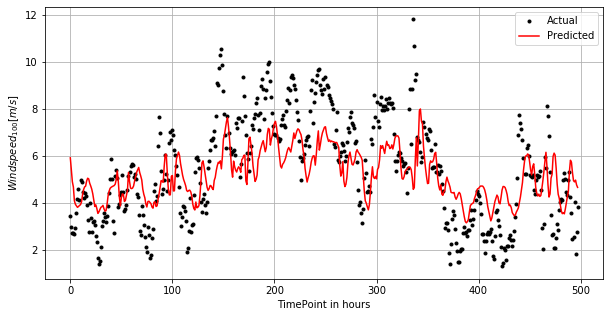

In [33]:
testScore, testPredictions, testYTrue = evaluate(dense, X_test, y_test, scaler_y, display = True, save_to='')

In [34]:
columns = ['Temperatura powietrza [K]','Temperatura punktu rosy [K]','Cinienie na pozimie morza [Pa]','Opad [m]','Date Time','windspeed']
data_interp = data_interp[columns]

test_wiatraki = datetimeToSignal(data_interp)

values_test_wiatraki = test_wiatraki.values

scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y.fit(values_test_wiatraki[:,4].reshape(len(values_test_wiatraki),1))

values_test_wiatraki = scaler.transform(values_test_wiatraki)

X_test_wiatraki, y_test_wiatraki = to_supervised(values_test_wiatraki, n_input=24, n_out=6)

Test Score: 3.0534 RMSE


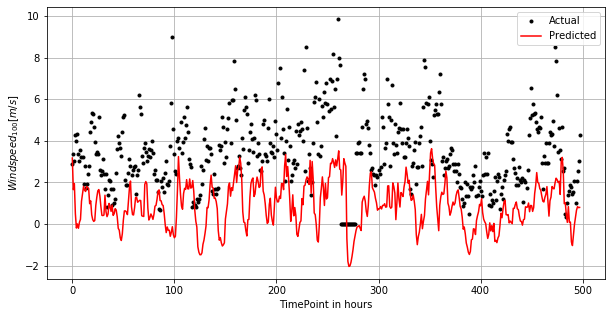

In [35]:
testScore, testPredictions, testYTrue = evaluate(dense, X_test_wiatraki, y_test_wiatraki, scaler_y, display = True, save_to='')

d:\Programy\Anaconda\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
d:\Programy\Anaconda\envs\tf_gpu\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


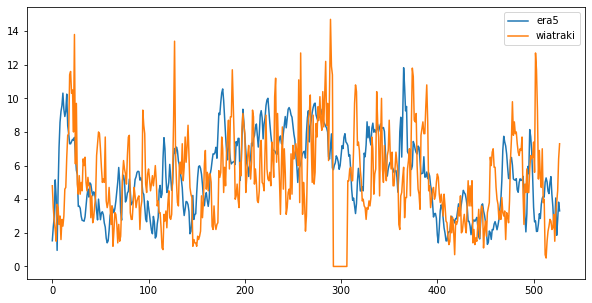

In [37]:
plt.figure(figsize=[10,5])
plt.plot(range(len(test['windspeed_100'])),test['windspeed_100'])
plt.plot(range(len(data_interp['windspeed'])),data_interp['windspeed'])
plt.legend(['era5','wiatraki'])

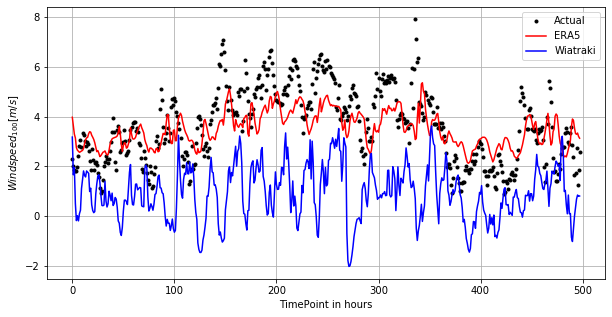

In [38]:
# make predictions
testPredictions = dense.predict(X_test)
testWiatrakiPred = dense.predict(X_test_wiatraki)

# invert scalling
testPredictions = scaler_y.inverse_transform(testPredictions)
testYTrue = scaler_y.inverse_transform(y_test)
testPredictionsWaitraki = scaler_y.inverse_transform(testWiatrakiPred)
testYTrueWiatraki = scaler_y.inverse_transform(y_test_wiatraki)

length = 498
# start = random.randrange(len(testYTrue)-length)
# end = start+length
plt.figure(figsize=[10,5])
plt.xlabel('TimePoint in hours')
plt.ylabel('$Windspeed_{100}[m/s]$')
plt.grid()
plt.plot(range(length), testYTrue,'k.')
plt.plot(range(length),testPredictions,'r')
plt.plot(range(length),testPredictionsWaitraki,'b')
plt.legend(['Actual','ERA5', 'Wiatraki'])
# plt.savefig(save_to)